<a href="https://colab.research.google.com/github/sanaaria/Ann/blob/main/Copy_of_Ann_Hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

اتصال به گوگل درایو

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


صدا کردن فایل ها تست وترین و پرد

In [ ]:
train_data="/content/drive/MyDrive/kaggle2/seg_train/seg_train"

In [ ]:
test_data="/content/drive/MyDrive/kaggle2/seg_test/seg_test"

In [ ]:
pred_data="/content/drive/MyDrive/kaggle2/seg_pred"

In [ ]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
import os
import torch
import tarfile
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

اتصال به دیوایس

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ترنسفرم کردن و به تنسور دادن

In [ ]:
transform_train = transforms.Compose([
    
    transforms.Resize((150,150)), #becasue vgg takes 150*150
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

#Augmentation is not done for test/validation data.
transform_test = transforms.Compose([
    
    transforms.Resize((150,150)), #becasue vgg takes 150*150
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

In [ ]:
train_ds = ImageFolder(train_data, transform=transform_train)
test_ds = ImageFolder(test_data, transform=transform_test)
pred_ds = ImageFolder(pred_data, transform=transform_test)

In [ ]:
print(train_ds.classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
import os


In [ ]:
sea_files = os.listdir(train_data+ "/sea")
print(len(sea_files))

2274


In [ ]:
classes = os.listdir(test_data )
print(classes)

['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']


In [ ]:
sea_files = os.listdir(test_data + "/sea")
print(len(sea_files))

510


In [ ]:
classes = os.listdir(pred_data )
print(classes)

['seg_pred']


In [ ]:
len(train_ds),len(test_ds),len(pred_ds)

(14034, 3000, 6165)

In [ ]:
image,label  = train_ds[0]
print(image.shape, label)

torch.Size([3, 150, 150]) 0


In [ ]:
image

tensor([[[-0.5373, -0.5686, -0.5294,  ..., -0.7569, -0.6000, -0.5059],
         [-0.3961, -0.6314, -0.6627,  ..., -0.8275, -0.5686, -0.6941],
         [-0.6314, -0.5137, -0.6157,  ..., -0.6000, -0.6471, -0.2627],
         ...,
         [ 0.9294,  0.9294,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9373,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9373,  0.9373,  0.9451,  ...,  0.9451,  0.9373,  0.9373]],

        [[-0.5451, -0.5765, -0.5373,  ..., -0.7961, -0.6392, -0.5451],
         [-0.4039, -0.6392, -0.6706,  ..., -0.8667, -0.6078, -0.7333],
         [-0.6392, -0.5216, -0.6235,  ..., -0.6392, -0.6863, -0.3020],
         ...,
         [ 0.9294,  0.9294,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9373,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9373,  0.9373,  0.9451,  ...,  0.9451,  0.9373,  0.9373]],

        [[-0.5608, -0.5922, -0.5529,  ..., -0.8196, -0.6627, -0.5686],
         [-0.4196, -0.6549, -0.6863,  ..., -0

In [ ]:
image.numpy()

array([[[-0.5372549 , -0.5686275 , -0.5294118 , ..., -0.75686276,
         -0.6       , -0.5058824 ],
        [-0.3960784 , -0.6313726 , -0.6627451 , ..., -0.827451  ,
         -0.5686275 , -0.69411767],
        [-0.6313726 , -0.5137255 , -0.6156863 , ..., -0.6       ,
         -0.64705884, -0.26274508],
        ...,
        [ 0.92941177,  0.92941177,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.9372549 ,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.9372549 ,  0.9372549 ,  0.94509804, ...,  0.94509804,
          0.9372549 ,  0.9372549 ]],

       [[-0.54509807, -0.5764706 , -0.5372549 , ..., -0.79607844,
         -0.6392157 , -0.54509807],
        [-0.40392154, -0.6392157 , -0.67058825, ..., -0.8666667 ,
         -0.60784316, -0.73333335],
        [-0.6392157 , -0.52156866, -0.62352943, ..., -0.6392157 ,
         -0.6862745 , -0.30196077],
        ...,
        [ 0.92941177,  0.92941177,  0.9372549 , ...,  

ساخت دیتا لودری کهداده هارا بچ بچ کند :)

In [ ]:
batch_size=64
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)
pred_dl = DataLoader(pred_ds, batch_size, num_workers=4, pin_memory=True)

In [ ]:
batch_size=64
train_dl2 = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

یه بچ رو تصویر میکنیم

images.shape: torch.Size([128, 3, 150, 150])


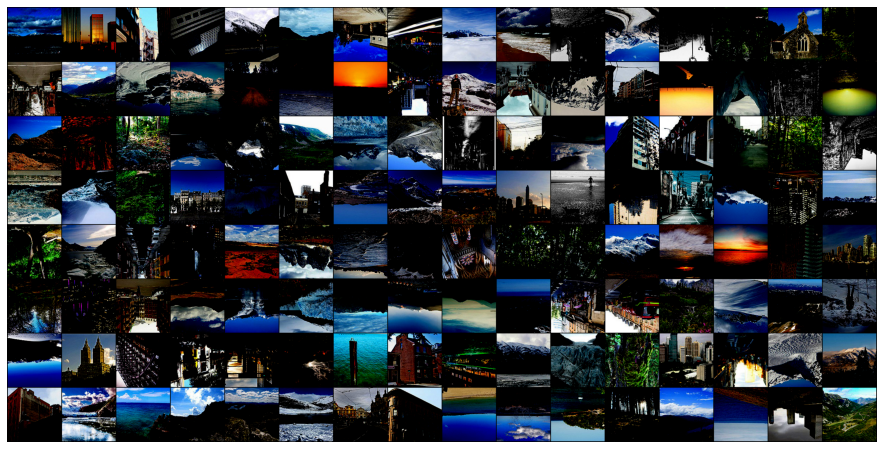

In [ ]:
for images, _ in train_dl2:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

صدا زدن مدل آماده ی resnet


In [ ]:
import torchvision.models as models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model= models.resnet101(pretrained=True)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters() :
    param.requires_grad = False

in_features = model.fc.in_features
last_layer = nn.Linear(in_features, 6)
model.fc = last_layer
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

اپتیمایزر و لاس رو تعریف میکنیم

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.003)
criterion = nn.CrossEntropyLoss()

مدل رو آموزش میدیم

In [ ]:
n_total_steps = len(train_dl)
print(n_total_steps)
model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dl):
# origin shape: [4, 3, 32, 32] = 4, 3, 1024
# input_layer: 3 input channels, 6 output channels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 110 == 0:
      print(str(epoch+1) + " epoch loss is" + str(loss.item()))
      # clear_output()
print('Finished Training')


110
1 epoch loss is1.0583598613739014
2 epoch loss is0.6825854778289795
3 epoch loss is0.6197239756584167
4 epoch loss is0.5644786953926086
5 epoch loss is0.5572239756584167
6 epoch loss is0.5611425042152405
7 epoch loss is0.5207522511482239
8 epoch loss is0.2988036870956421
9 epoch loss is0.49736106395721436
10 epoch loss is0.4714149236679077
Finished Training


مدل رو سیو میکنیم

In [ ]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


مدل رو روی داده ی تست امتحان میکنیم ولاس رو به دست می آوریم

In [ ]:
with torch.no_grad():
  # n_correct = 0
  # n_samples = 0
  # n_class_correct = [0 for i in range(10)]
  # n_class_samples = [0 for i in range(10)]
  for images, labels in test_dl:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)
    # if (i+1) % 500 == 0:
    #   print(" loss is" + str(loss.item()))
      # clear_output()
print('Finished Training' + str(loss.item()) )

Finished Training2.376619815826416
